# Safe Transaction Project 

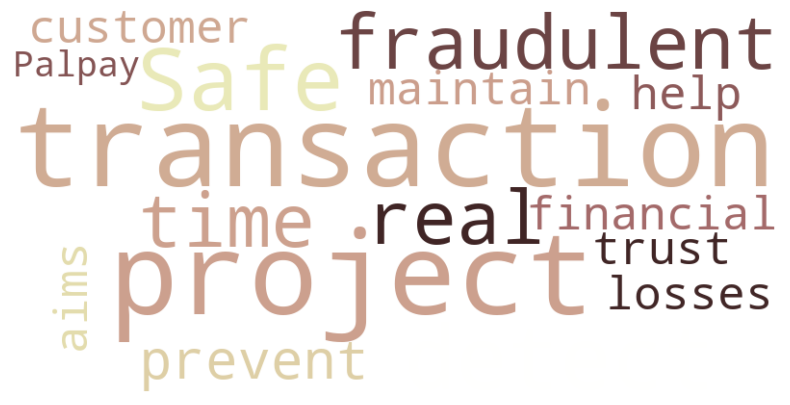

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text_data = '''
Safe transaction , its a project to detect fraudulent transactions in real-time to
prevent financial losses and maintain customer trust. This project aims to help Palpay.
'''

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='pink').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('')
plt.show()

### Library Installation

In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA

print("hi")


hi


### Read the Data from CSV file 

In [4]:
df = pd.read_csv('copy.csv')

# Step 2: Verify the contents of the DataFrame or its keys (column names)
if df is not None:
    print("Data loaded successfully.")
    print("Column names (keys):", df.keys())
else:
    print("Error loading data from the CSV file.")


Data loaded successfully.
Column names (keys): Index(['Transaction Date ', 'Card Category ', 'Card Type', 'Card Type AR ',
       'Channel ', 'Channel AR ', 'Transaction Type', 'Transaction Type Group',
       'Entry Mode', 'Transaction Status ', 'Outlet ID', ' Merchant Acronym',
       'Merchant Desc', 'Merchant Country', 'Merchant Activity ',
       'Merchant Activity sub ', 'Client Code', 'Amount ', 'Amount USD',
       'Transaction Currency '],
      dtype='object')


### Apply PCA for feature selection (additional step - optional )

In [5]:
numeric_features = df.select_dtypes(include=[float, int])

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(numeric_scaled)
print("hi")

hi


In [6]:
print(X_pca)

[[ 0.55694944 -0.3539903   0.42483718]
 [ 0.53128849 -0.28876598  0.40850294]
 [ 0.10680534 -0.31794647  0.77739908]
 ...
 [-1.04544897  0.52512287 -0.70891762]
 [-1.17343229  0.52893036 -0.5796264 ]
 [-1.19992707  0.52640301 -0.55497102]]


# Visualize The Data Before Processing


## Correlation Heatmap

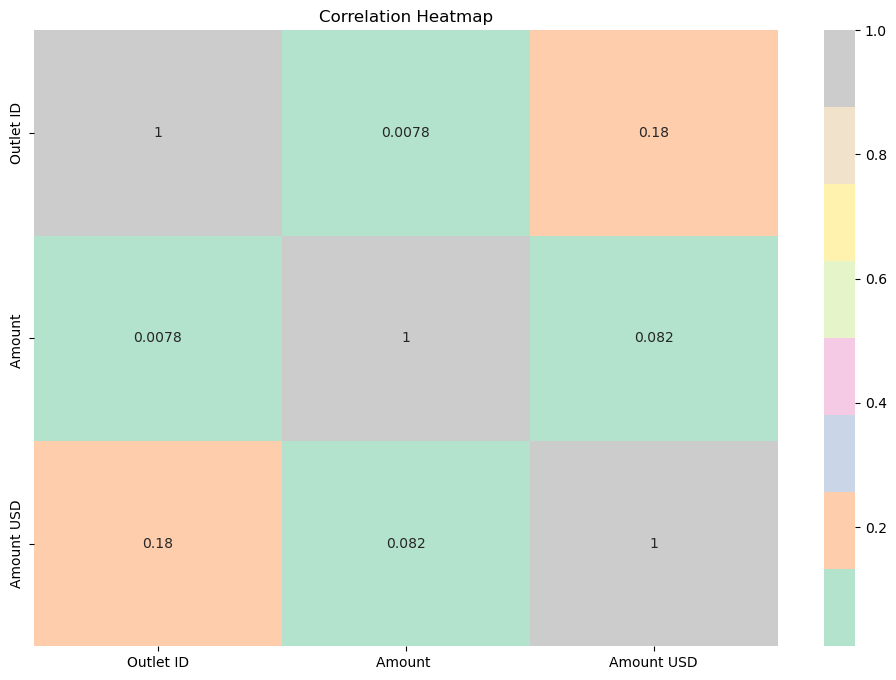

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = pd.read_csv("./copy.csv")

corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2')

plt.title('Correlation Heatmap')

plt.show()


In [8]:
# print(df.head()) # Print the first few rows of the DataFrame
# print(df.keys()) # Print the column names of the DataFrame


## Pie Plots

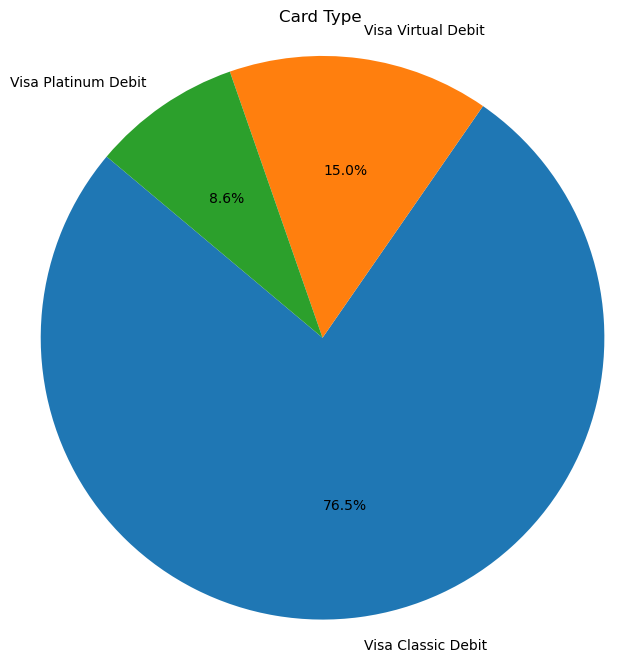

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


card_type_counts = df['Card Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Card Type ')
plt.axis('equal')  
plt.show()


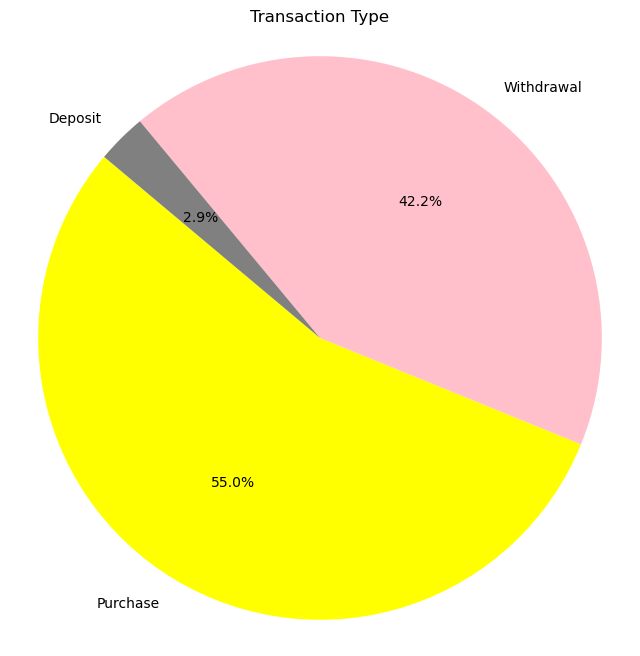

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


card = df['Transaction Type'].value_counts()
custom_colors = ['yellow', 'pink', 'grey']


plt.figure(figsize=(8, 8))
plt.pie(card, labels=card.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Transaction Type')
plt.axis('equal')  
plt.show()


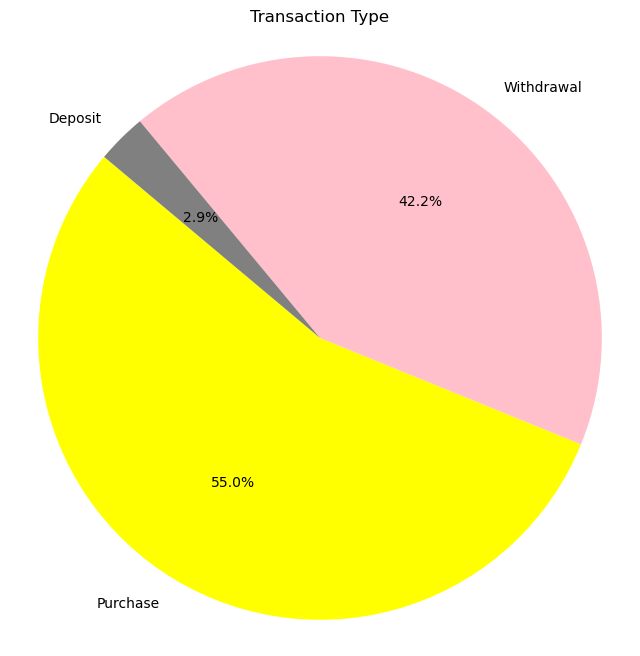

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


card = df['Transaction Type'].value_counts()
custom_colors = ['yellow', 'pink', 'grey']


plt.figure(figsize=(8, 8))
plt.pie(card, labels=card.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Transaction Type')
plt.axis('equal')  
plt.show()


In [12]:
print(df.columns)


Index(['Transaction Date ', 'Card Category ', 'Card Type', 'Card Type AR ',
       'Channel ', 'Channel AR ', 'Transaction Type', 'Transaction Type Group',
       'Entry Mode', 'Transaction Status ', 'Outlet ID', ' Merchant Acronym',
       'Merchant Desc', 'Merchant Country', 'Merchant Activity ',
       'Merchant Activity sub ', 'Client Code', 'Amount ', 'Amount USD',
       'Transaction Currency '],
      dtype='object')


## Histogram For All Numerical Column 

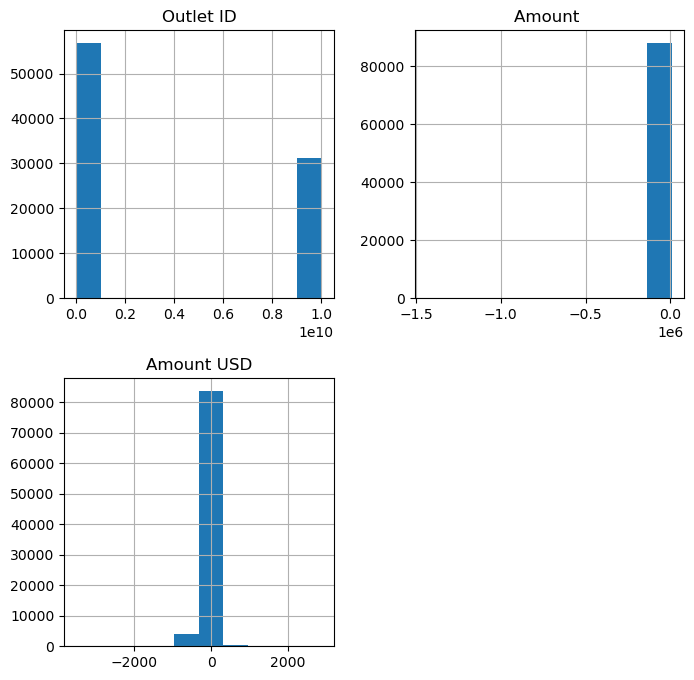

In [13]:


import pandas as pd
import matplotlib.pyplot as plt

data = pd.data =  pd.read_csv('copy.csv')

data.hist(figsize=(8, 8))
plt.show()





## Time Series Plot

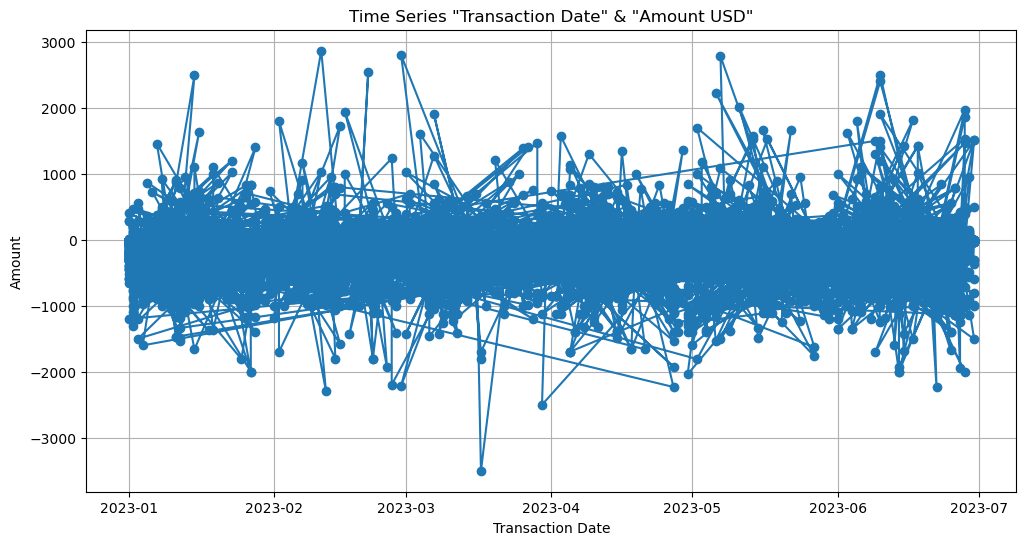

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('copy.csv')



# Time Series Data
data['Transaction Date '] = pd.to_datetime(data['Transaction Date '])
plt.figure(figsize=(12, 6))
plt.plot(data['Transaction Date '], data['Amount USD'], marker='o')
plt.xlabel('Transaction Date')
plt.ylabel('Amount')
plt.title('Time Series "Transaction Date" & "Amount USD"')
plt.grid(True)
plt.show()



## WordCloud 

In [15]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



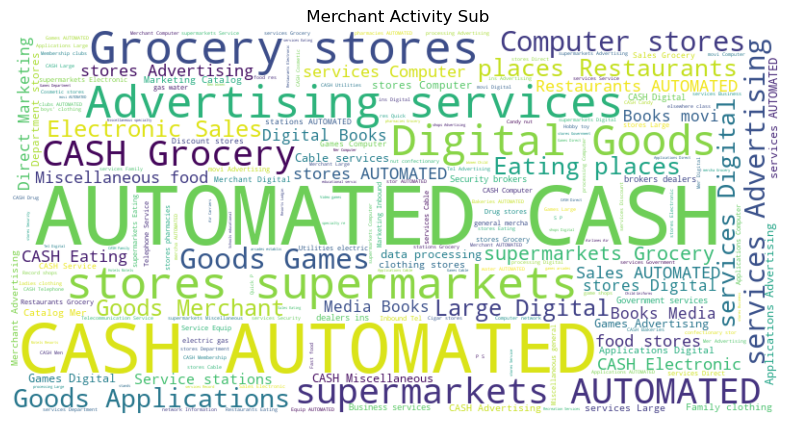

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('copy.csv')


    # Remove the extra space from the column name 'Merchant Activity sub '
    data.rename(columns={'Merchant Activity sub ': 'Merchant Activity sub'}, inplace=True)

    # Select the 'Merchant Activity sub' column data
    text_data = data['Merchant Activity sub']

    text_data_combined = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data_combined)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(' Merchant Activity Sub')
    plt.show()

except KeyError as e:
    print(f"Error: {e}. The specified column name does not exist in the DataFrame.")
except FileNotFoundError:
    print("Error: The CSV file 'copy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


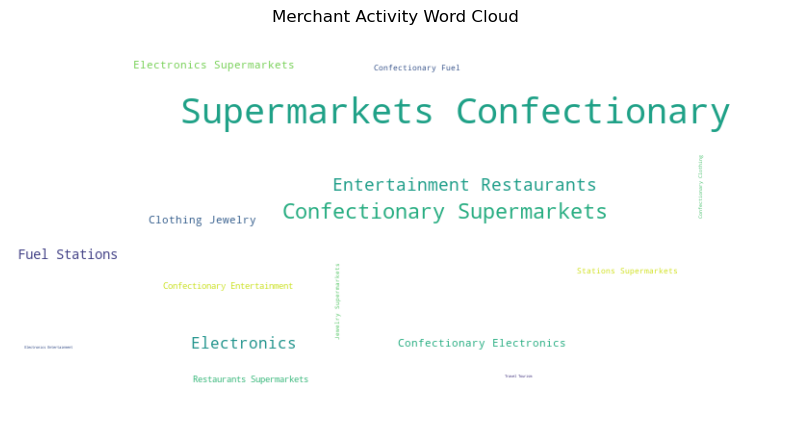

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('copy.csv')

    data.rename(columns={'Merchant Activity ': 'Merchant Activity'}, inplace=True)

    data['Merchant Activity'] = data['Merchant Activity'].astype(str).replace('nan', '').replace('NAN', '')

    text_data = data['Merchant Activity']

    text_data_combined = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data_combined)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title('Merchant Activity Word Cloud')
    plt.show()

except KeyError as e:
    print(f"Error: {e}. The specified column name does not exist in the DataFrame.")
except FileNotFoundError:
    print("Error: The CSV file 'copy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


# Visualize The Data After Processing


In [18]:
Ndt = pd.read_csv('newData.csv')

if df is not None:
    print("Data loaded successfully.")
    print("Column names (keys):", Ndt.keys())
else:
    print("Error loading data from the CSV file.")

Data loaded successfully.
Column names (keys): Index(['Transaction Date ', 'Card Type', 'Channel ', 'Transaction Type',
       'Transaction Type Group', 'Entry Mode', 'Transaction Status ',
       'Outlet ID', 'Merchant Country', 'Merchant Activity ', 'Client Code',
       'Amount USD'],
      dtype='object')


In [ ]:
pip install  folium 


In [ ]:
import pandas as pd

# Read the CSV file containing the data
data = pd.read_csv('newData.csv')

# Remove white spaces from column names
data.rename(columns=lambda x: x.strip(), inplace=True)

# Now the column names will not have any white spaces
print(data.columns)


## Bar Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud

# Read the CSV file containing the data
data = pd.read_csv('newData.csv')

# Bar Chart or Count Plot for 'Card Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Card Type', data=data)
plt.title('Transaction Counts by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Time Series Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud

# Read the CSV file containing the data
data = pd.read_csv('newData.csv')



# Time Series Plot for 'Transaction Date' and 'Amount USD'
data['Transaction Date '] = pd.to_datetime(data['Transaction Date '])
plt.figure(figsize=(10, 6))
plt.plot(data['Transaction Date '], data['Amount USD'])
plt.title('Time Series of Transaction Amounts')
plt.xlabel('Transaction Date')
plt.ylabel('Amount USD')
plt.show()


## Geographic Map as HTML file

In [ ]:
import pandas as pd
import folium

state_geo = "us-states.json"

state_data = pd.read_csv('newData.csv')

state_data.rename(columns={'Merchant Country ': 'Merchant Country'}, inplace=True)

m = folium.Map(location=[37, -102], zoom_start=5)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['Merchant Country', 'Amount USD'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name=' Amount in USD ($)'
)

# Save to html
m.save('folium_MAP.html')
print("Map Downloaded successfully")


## Sunburst Chart

In [ ]:
pip install plotly


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read data from 'newData.csv'
data = pd.read_csv('newData.csv')

# Group data by 'Transaction Type' and 'Card Type' and calculate the sum of 'Amount USD' for each group
grouped_data = data.groupby(['Transaction Type', 'Card Type'])['Amount USD'].sum().reset_index()

# Create the Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=grouped_data['Transaction Type'] + ' - ' + grouped_data['Card Type'],
    parents=grouped_data['Transaction Type'],
    values=grouped_data['Amount USD']
))

# Update layout and display the chart
fig.update_layout(title_text="Sunburst Chart", height=600)
fig.show()


## Network Graph



In [ ]:
pip install networkx 


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read data from 'newData.csv'
data = pd.read_csv('newData.csv')

# Remove the extra space from the column name 'Merchant Activity '
data.rename(columns={'Transaction Type': 'Transaction Type'}, inplace=True)

# Group data by 'Merchant Country' and 'Merchant Activity' and calculate the sum of 'Amount USD' for each group
grouped_data = data.groupby(['Merchant Country', 'Transaction Type'])['Amount USD'].sum().reset_index()

# Create a directed graph
G = nx.DiGraph()

# Add nodes (only 'Merchant Country') to the graph
G.add_nodes_from(grouped_data['Transaction Type'], node_color='skyblue', node_size=2000, label_pos='center')

# Add edges (Merchant Country -> Merchant Activity) to the graph with 'Amount USD' as edge weights
for _, row in grouped_data.iterrows():
    G.add_edge(row['Merchant Country'], row['Transaction Type'], weight=row['Amount USD'])

# Set node colors for better visualization
node_colors = {node: 'skyblue' for node in G.nodes()}

# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.9)  # Adjust the 'k' parameter to control spacing between nodes
nx.draw_networkx(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, font_size=10, node_color=[node_colors[n] for n in G.nodes()], node_size=2000, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
plt.title('Network Graph', fontsize=15)
plt.axis('off')
plt.show()


## Choropleth Map interactive

In [ ]:
import pandas as pd
import plotly.express as px

# Read data from the CSV file
data = pd.read_csv('newData.csv')

# Sample data for demonstration
# Replace 'us-states.json' with the path to your GeoJSON file
geojson_data = 'us-states.json'

# Create a choropleth map
fig = px.choropleth(data, geojson=geojson_data, locations='Merchant Country', color='Amount USD', 
                    featureidkey='properties.name', projection='mercator')

# Set the title and adjust the size of the figure
fig.update_layout(title_text=' Amount USD by Merchant Country', title_x=0.7,
                  width=900, height=900)  # Set the desired width and height in pixels

fig.show()


In [ ]:
print(data.columns)


## Grouped boxplot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('newData.csv')

# Remove rows with null values in 'Amount USD' column
data = data.dropna(subset=['Amount USD'])

# Create a grouped boxplot
sns.boxplot(x='Card Type', y='Amount USD', hue='Transaction Status ', data=data, showfliers=False)

# Set the plot title and axis labels
plt.title('Box Plot - Amount and Fraud by Card Type')
plt.xlabel('Transaction Status')
plt.ylabel('Amount USD')
plt.legend(title='Transaction Status')

# Show the plot
plt.show()
